# <center>  Code python de la deuxième partie des series temporelles </center> #

Ce notebook contient le script python utilisé pour chaque question de la partie  des series temporelles du projet d'économétrie . On rappelle que le travail a été réalisé à la fois sous python et matlab . La partie théorique a été developpé dans le rapport. 
##### Le travail a été réalisé par Mohamed DHAOUI  et Matthieu Roussel 

## Chargement des packages 

In [61]:
import xlrd 
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import datetime
import numpy as np
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.tsa.ar_model as ar_model
from statsmodels.api import add_constant
import statsmodels
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARMA
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
%matplotlib notebook 


## Question  1 : Chargement des données  

In [62]:
df=pd.read_excel('quarterly.xls')  # doctest: +SKIP

In [63]:
df.head(10)

,DATE,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,M1NSA,M2SA,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr
0,1960Q1,3.93,3.87,4.57,4.64,4.49,31.67,33.20,29.40,18.92,140.53,896.1,299.40,5.13,23.93,2845.3,2824.2,18.521,31.830
1,1960Q2,3.70,2.99,3.87,4.30,4.26,31.73,33.40,29.57,19.00,138.40,903.3,300.03,5.23,23.41,2832.0,2851.2,18.579,31.862
2,1960Q3,2.94,2.36,3.07,3.67,3.83,31.63,33.43,29.59,19.07,139.60,919.4,305.50,5.53,23.02,2836.6,2878.7,18.648,32.217
3,1960Q4,2.30,2.31,2.99,3.75,3.89,31.70,33.67,29.78,19.14,142.67,932.8,312.30,6.27,22.47,2800.2,2906.7,18.700,32.624
4,1961Q1,2.00,2.35,2.87,3.64,3.79,31.80,33.63,29.84,19.17,142.23,948.9,317.10,6.80,22.13,2816.9,2934.8,18.743,32.073
5,1961Q2,1.73,2.30,2.94,3.62,3.79,31.47,33.33,29.83,19.23,141.40,966.4,320.97,7.00,23.00,2869.6,2962.9,18.785,32.131
6,1961Q3,1.68,2.30,3.01,3.90,3.98,31.50,33.33,29.95,19.32,142.00,982.7,326.50,6.77,23.74,2915.9,2991.3,18.843,32.699
7,1961Q4,2.40,2.46,3.10,3.84,3.97,31.53,33.37,29.99,19.37,146.63,1000.0,334.70,6.20,24.57,2975.3,3019.9,18.908,33.421
8,1962Q1,2.46,2.72,3.21,3.84,4.02,31.70,33.53,30.11,19.44,146.37,1020.7,341.17,5.63,24.94,3028.7,3048.7,19.020,33.136
9,1962Q2,2.61,2.72,3.02,3.63,3.87,31.53,33.43,30.22,19.51,145.33,1042.3,346.23,5.53,25.18,3062.1,3078.0,19.047,33.468


In [64]:
df.describe()[["CPI","Unemp"]]

,CPI,Unemp
count,212.000000,212.000000
mean,113.182028,6.081981
std,65.310267,1.614394
min,29.400000,3.400000
25%,43.705000,4.970000
50%,109.635000,5.715000
75%,167.507500,7.130000
max,231.280000,10.670000


## Question 2 :  calcul de l'inflation 

In [65]:
inf=[]
unemp=[]

listdate=[]

for t in range(1,len(df.CPI.values)):
    
    inf.append((df.CPI.values[t] -df.CPI.values[t-1] )/(df.CPI.values[t-1] ))
    unemp.append(df.Unemp.values[t])
    listdate.append( df.DATE.values[t])


<IPython.core.display.Javascript object>


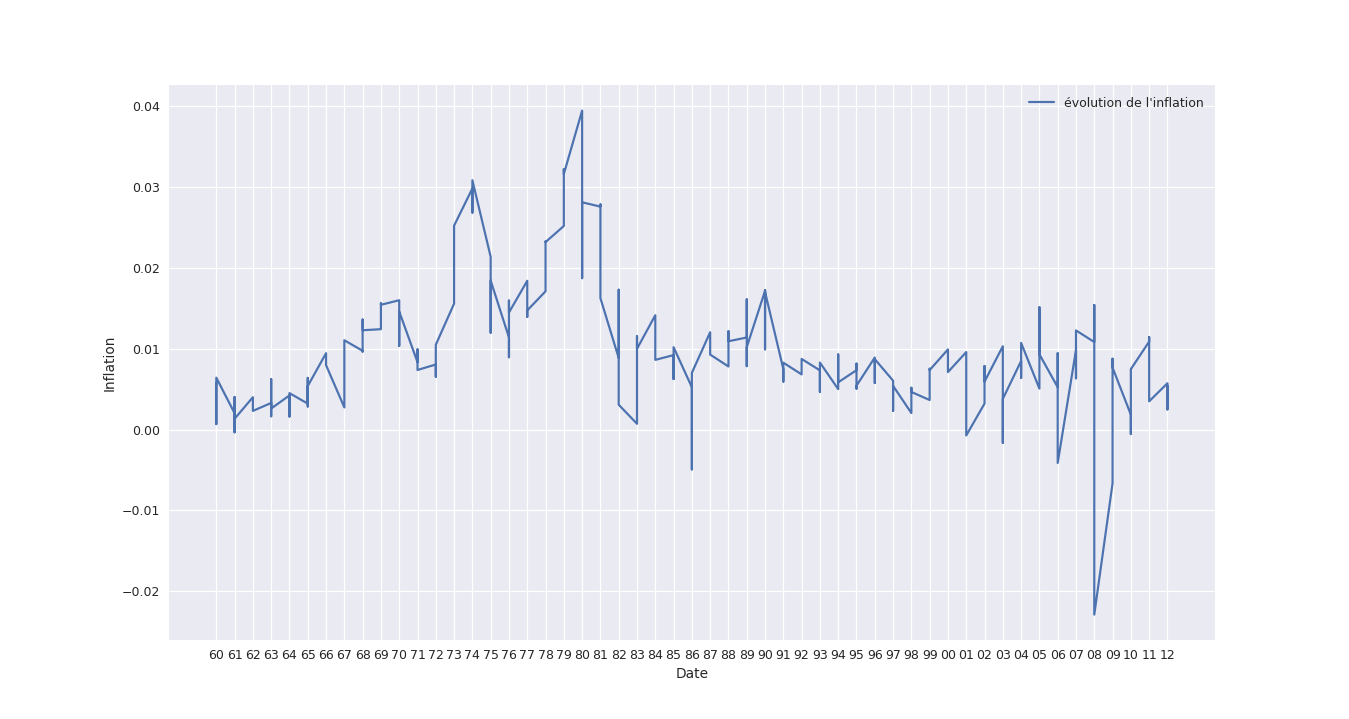

<function matplotlib.pyplot.close(fig=None)>

In [66]:

sns.set(style="darkgrid")
plt.figure(figsize=(15,8))

x =listdate
x=list ( map( lambda x: x[2:4] ,df.DATE.values[1:]))
y = inf

plt.plot(x,y)
plt.xlabel("Date")
plt.ylabel("Inflation")

plt.legend(["évolution de l'inflation"])
plt.show()
plt.close


## Question 4

Check Stationarity 

In [57]:

from pandas import Series
from statsmodels.tsa.stattools import adfuller
 

stationary = inf

# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.919056
p-value: 0.043177
Critical Values:
	1%: -3.462
	5%: -2.876
	10%: -2.574


The results show that the test statistic value -2.919056 is smaller than the critical value at 5% of -2.876. This suggests that we can reject the null hypothesis with a significance level of less than 5% (i.e. a low probability that the result is a statistical fluke).

Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

## Question 3

<IPython.core.display.Javascript object>


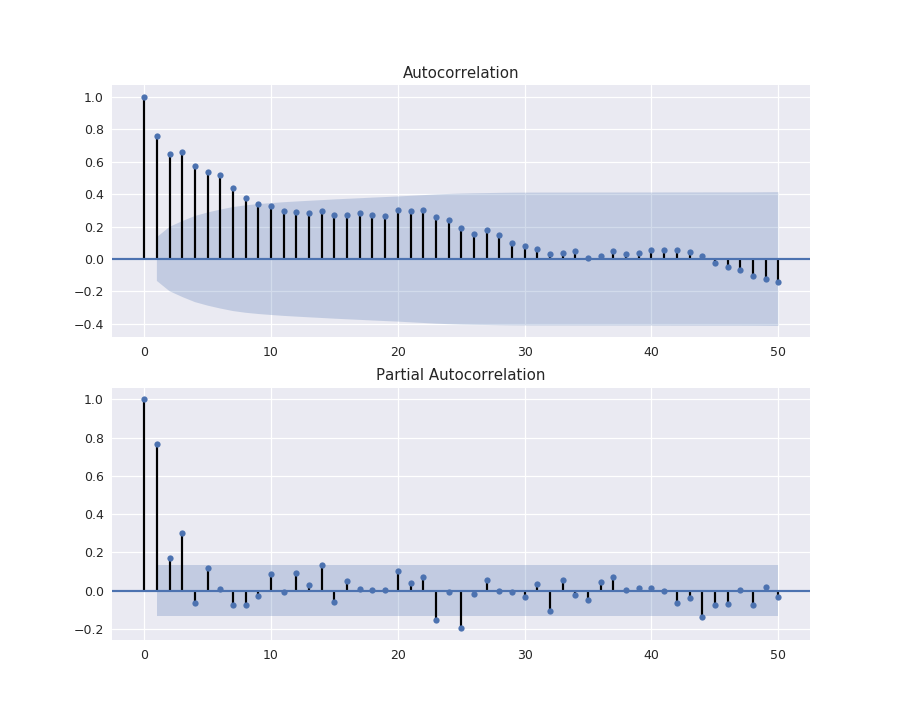

In [33]:

series = y

sns.set(style="darkgrid")


plt.figure(figsize=(10,8))
plt.subplot(211)
plot_acf(series, ax=plt.gca(),lags=50)
plt.subplot(212)
plot_pacf(series, ax=plt.gca(),lags=50,alpha=0.05)
plt.show()


## Question 4

In [ ]:


ar = ar_model.AR(y)
model_ar = ar.fit(method='mle', maxlag=15, disp=0, maxiter=1000,ic='aic')



In [18]:
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(y, order=(3,0))
result = mod.fit()

In [22]:
print(result.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  211
Model:                     ARMA(3, 0)   Log Likelihood                -140.667
Method:                       css-mle   S.D. of innovations              0.470
Date:                Wed, 24 Apr 2019   AIC                            291.335
Time:                        22:45:28   BIC                            308.094
Sample:                             0   HQIC                           298.109
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9413      0.219      4.289      0.000       0.511       1.371
ar.L1.y        0.5792      0.065      8.843      0.000       0.451       0.708
ar.L2.y       -0.0173      0.077     -0.225      0.8

he model AIC has reduced, which is good. The P Values of the AR1 and MA1 terms have improved and are highly significant (<< 0.05).

Let’s plot the residuals to ensure there are no patterns (that is, look for constant mean and variance).

<IPython.core.display.Javascript object>


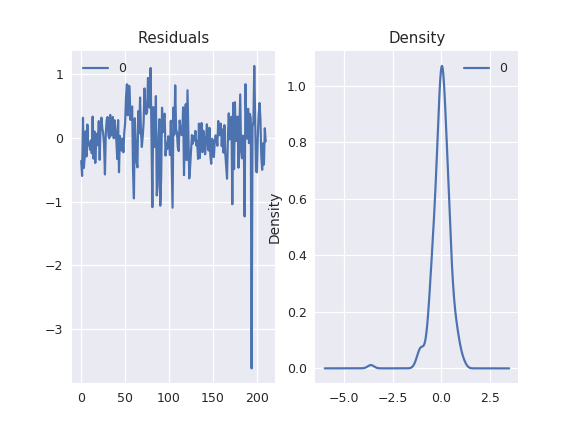

In [23]:
# Plot residual errors
residuals = pd.DataFrame(result.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

<IPython.core.display.Javascript object>


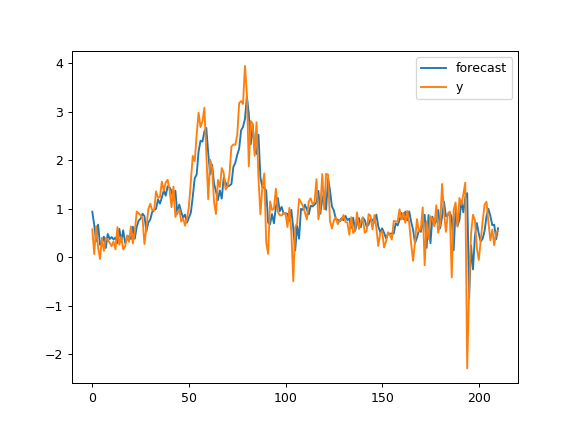

In [23]:
# Actual vs Fitted
result.plot_predict(dynamic=False)
plt.show()

determine p using BIC

## Question 5

In [ ]:



range_p = range(0,20)
listbic=[]
for p in range_p :
    mod = ARMA(y, order=(p,0))
    result = mod.fit()
    listbic.append(result.bic)

<IPython.core.display.Javascript object>


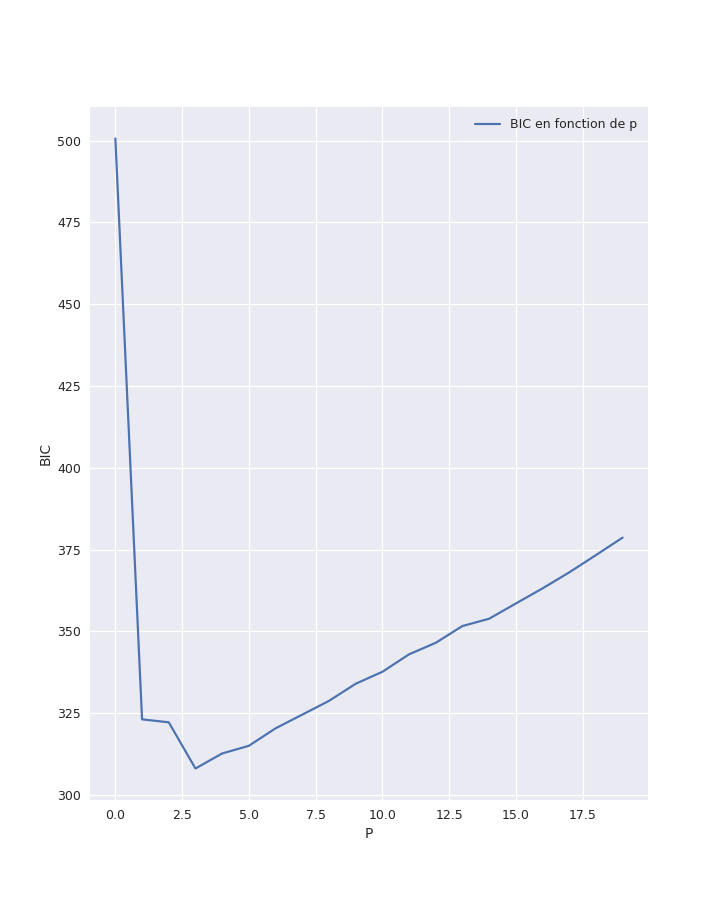

<function matplotlib.pyplot.close(fig=None)>

In [42]:

sns.set(style="darkgrid")
plt.figure(figsize=(8,10))

x =range_p
y = listbic
plt.plot(x,y)
plt.xlabel("P")
plt.ylabel("BIC")

plt.legend(["BIC en fonction de p"])
plt.show()
plt.close


https://s3.amazonaws.com/assets.datacamp.com/production/course_4267/slides/chapter3.pdf

## Question 6

In [112]:
x =inf
y = df.Unemp[0:-1]
df_inf_unemp=pd.DataFrame(x,y).reset_index()

In [113]:
df_inf_unemp.columns=["Unemp","Inf"]
df_inf_unemp.head()

,Unemp,Inf
0,5.13,0.578231
1,5.23,0.067636
2,5.53,0.642109
3,6.27,0.201478
4,6.80,-0.033512


In [202]:

x =inf
X=add_constant(x)
y =unemp
model=statsmodels.api.OLS(y, X)
result=model.fit()

In [58]:
######### new ##########""

from statsmodels.api import add_constant
import statsmodels
x =unemp
X=add_constant(x)
y = inf
model=statsmodels.api.OLS(y, X)
result=model.fit()

In [61]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.01214
Date:                Thu, 25 Apr 2019   Prob (F-statistic):              0.912
Time:                        21:40:27   Log-Likelihood:                -400.28
No. Observations:                 211   AIC:                             804.6
Df Residuals:                     209   BIC:                             811.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0708      0.181     33.576      0.000       5.714       6.427
x1             1.5908     14.440      0.110      0.912     -26.876      30.058
==============================================================================
Omnibus:                       13.872   Durbin-Watson:                   0.044
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.356
Skew:                           0.660   Prob(JB):                     0.000463
Kurtosis:                       2.937   Cond. No.                         129.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<IPython.core.display.Javascript object>


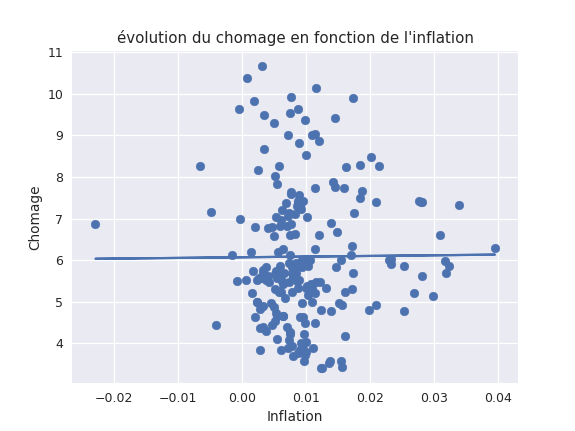

In [63]:
%matplotlib notebook 

X_plot =np.array(x)
plt.plot(x, X_plot*result.params[1] + result.params[0])
plt.scatter(x,y)

plt.xlabel("Inflation")
plt.ylabel("Chomage")

plt.title("évolution du chomage en fonction de l'inflation")
plt.show()
plt.close


plt.show()

## Question 7

In [64]:
resid=y-result.predict(X)

In [65]:
residuals = pd.DataFrame(resid)
residuals.colnames="residuals"
# summary statistics
print(residuals.describe())

                  0
count  2.110000e+02
mean  -4.209376e-16
std    1.616846e+00
min   -2.690575e+00
25%   -1.111809e+00
50%   -3.493282e-01
75%    1.039518e+00
max    4.594293e+00


<IPython.core.display.Javascript object>


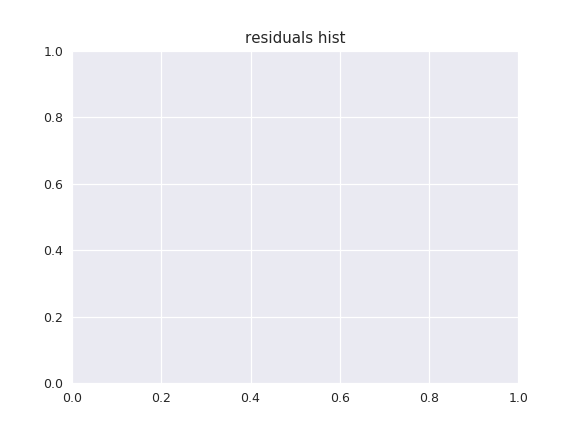

<IPython.core.display.Javascript object>


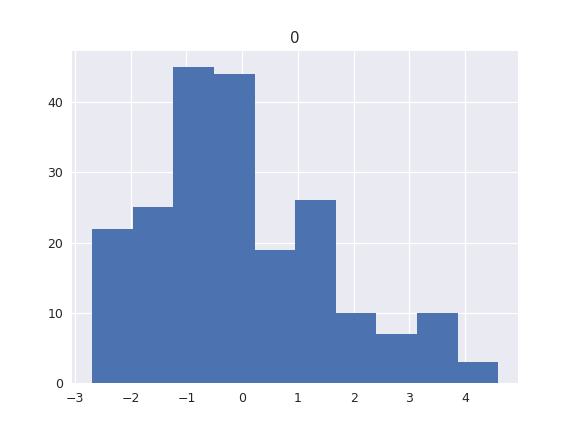

In [68]:
# histogram plot
plt.title("residuals hist")
residuals.hist()
plt.show()

<IPython.core.display.Javascript object>


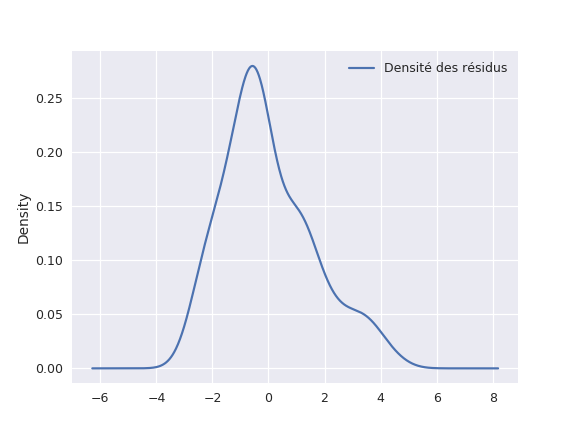

In [58]:
 #density plot
residuals.plot(kind='kde')
plt.legend(["Densité des résidus"])

plt.show()

We can see that the distribution does have a Gaussian look, but is perhaps more pointy, showing an exponential distribution with some asymmetry.



<IPython.core.display.Javascript object>


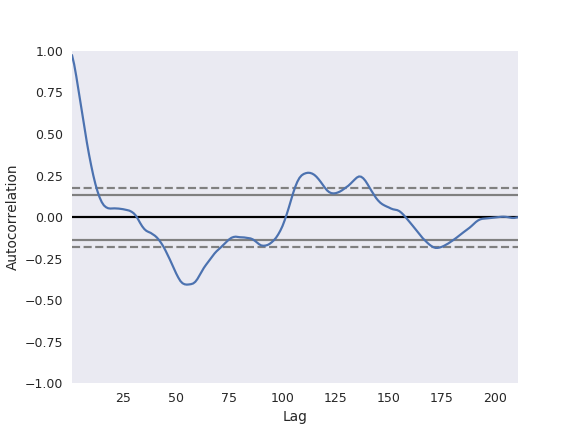

In [69]:
%matplotlib notebook 

autocorrelation_plot(residuals)
plt.show()

In [71]:
import statsmodels.stats.stattools as sm_tools
# Durbin–Watson Test
print(sm_tools.durbin_watson(residuals))
# Breusch-Godfrey Test

[0.04419413]


In [72]:
sm_tools.durbin_watson(residuals.values, axis=0)


array([0.04419413])

In [73]:
import statsmodels.stats.stattools as sm_diagnostic
import statsmodels
statsmodels.stats.diagnostic.acorr_breusch_godfrey(result, nlags = 2)


(205.5990298073486,
 2.2632781723969558e-45,
 3939.9402007464246,
 1.7684596485643072e-165)

## Question 8


In [93]:
mod_res = ARMA(residuals, order=(1,0))
result_res = mod_res.fit(trend='nc')

In [94]:
#1-(sm_tools.durbin_watson(residuals)[0]/2)

rho=result_res.params[0]

In [95]:
y_r=y.copy()

In [96]:
y_r_new=list(range(0,len(y_r)))
y_r_new[0]=np.sqrt(1-rho**2)* y_r[0]

In [97]:
for i in range( 1,len(y_r)) :
    y_r_new[i]= y_r[i]- rho* y_r[i-1]

In [98]:
x_new= X.copy()
x_new[0]= np.sqrt(1-rho**2) * X[0]


In [99]:
for i in range( 1,len(y_r)) :
    x_new[i]= X[i]- rho* X[i-1]

In [100]:
from statsmodels.api import add_constant
import statsmodels

model_corr=statsmodels.api.OLS(y_r_new, x_new)
result_corr=model_corr.fit()

In [101]:
result_corr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     30.15
Date:                Thu, 25 Apr 2019   Prob (F-statistic):           3.13e-12
Time:                        21:49:34   Log-Likelihood:                -66.947
No. Observations:                 211   AIC:                             137.9
Df Residuals:                     209   BIC:                             144.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             6.2987      0.838      7.520      0.000       4.647       7.950
x2            -9.9285      4.368     -2.273      0.024     -18.540      -1.317
==============================================================================
Omnibus:                       83.717   Durbin-Watson:                   0.728
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.951
Skew:                           1.627   Prob(JB):                     4.01e-64
Kurtosis:                       7.757   Cond. No.                         5.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<IPython.core.display.Javascript object>


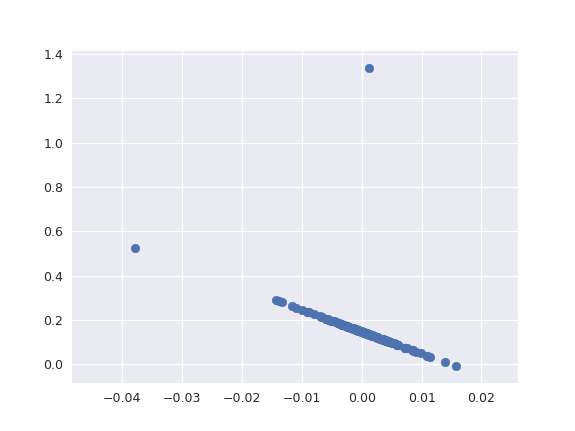

In [102]:
%matplotlib notebook 

plt.scatter(x_new[:,1], result_corr.predict(x_new))
#plt.scatter(x_new[:,1],np.array(y_r_new))
plt.show()

In [84]:
resid_new=y_r_new-result_corr.predict(x_new)

In [103]:
import statsmodels.stats.stattools as sm_tools
# Durbin–Watson Test
print(sm_tools.durbin_watson(resid_new))
# Breusch-Godfrey Test

0.7284065637543291


<IPython.core.display.Javascript object>


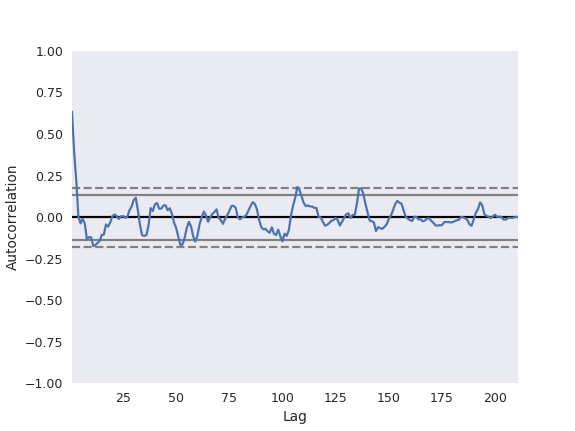

In [104]:
from pandas.tools.plotting import autocorrelation_plot
%matplotlib notebook 

autocorrelation_plot(resid_new)
plt.show()

In [108]:
import statsmodels.stats.stattools as sm_diagnostic
import statsmodels
statsmodels.stats.diagnostic.acorr_breusch_godfrey(result_corr, nlags = 2)

(89.42500023750766,
 3.8159961364585675e-20,
 75.37102193818286,
 2.727917244326048e-25)

In [105]:
1-(sm_tools.durbin_watson(residuals)[0]/2)


0.977902935962644

## Question 9

Tester la stabilité de la relation chômage-inflation sur deux sous-périodes de taille identique.

In [85]:
df.shape

(212, 19)

In [84]:
result_corr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     28.63
Date:                Tue, 23 Apr 2019   Prob (F-statistic):           1.03e-11
Time:                        22:03:07   Log-Likelihood:                -66.497
No. Observations:                 211   AIC:                             137.0
Df Residuals:                     209   BIC:                             143.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             6.3143      0.869      7.262      0.000       4.600       8.028
x2            -0.1062      0.044     -2.438      0.016      -0.192      -0.020
==============================================================================
Omnibus:                       81.960   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              269.826
Skew:                           1.615   Prob(JB):                     2.56e-59
Kurtosis:                       7.500   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
scr_g=1/(2*len(resid_new))*(np.dot(resid_new ,resid_new.T))

In [69]:
from statsmodels.api import add_constant
import statsmodels
x =inf
X=add_constant(x)
y =unemp
model=statsmodels.api.OLS(y, X)
result=model.fit()
x_new=X.copy()
y_r_new=y.copy()


x_t1=x_new[0:105]
y_t1=y_r_new[0:105]

x_t2=x_new[105:211]
y_t2=y_r_new[105:211]

In [70]:
x_new[0:100].shape
x_new[50:150].shape

(100, 2)

In [71]:
from statsmodels.api import add_constant
import statsmodels

model_t1=statsmodels.api.OLS(y_t1, x_t1)
result_t1=model_t1.fit()


model_t2=statsmodels.api.OLS(y_t2, x_t2)
result_t2=model_t2.fit()

In [209]:
result_t2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     3.315
Date:                Thu, 25 Apr 2019   Prob (F-statistic):             0.0715
Time:                        22:39:19   Log-Likelihood:                -193.35
No. Observations:                 106   AIC:                             390.7
Df Residuals:                     104   BIC:                             396.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4269      0.259     24.822      0.000       5.913       6.940
x1           -54.4051     29.882     -1.821      0.072    -113.663       4.853
==============================================================================
Omnibus:                       12.639   Durbin-Watson:                   0.082
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.065
Skew:                           0.890   Prob(JB):                     0.000883
Kurtosis:                       3.121   Cond. No.                         203.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [210]:
result_t1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.7071
Date:                Thu, 25 Apr 2019   Prob (F-statistic):              0.402
Time:                        22:39:20   Log-Likelihood:                -204.20
No. Observations:                 105   AIC:                             412.4
Df Residuals:                     103   BIC:                             417.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9377      0.287     20.662      0.000       5.368       6.508
x1            15.6225     18.579      0.841      0.402     -21.224      52.469
==============================================================================
Omnibus:                        3.884   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.143   Jarque-Bera (JB):                3.782
Skew:                           0.462   Prob(JB):                        0.151
Kurtosis:                       2.889   Cond. No.                         111.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

On remarque une différence entre les valeurs de la pente en le modèle globale et le modèle sur la periode t1 et le modèle sur la période t2 
Mais cela depend périodes choisi

Le test dépend de l'échantillon choisie 

In [211]:
param=1
z_score=(result_t1.params[param]-result_t2.params[param])/np.sqrt( result_t1.bse[param]**2 +  result_t2.bse[param]**2)

In [212]:
z_score

1.9901630198174496

In [213]:
import scipy
p_value=(1-scipy.special.ndtr(abs(z_score)))*2
p_value

0.04657298050782499

In [74]:
import stats

In [125]:
scipy.stats.norm.sf(abs(z_score))*2

0.04870431848601482

## Question 10

In [87]:
import scipy.stats

kk=2

listk=range (20,180)
listdate=[]
listchowstatistic=[]
prem_rupture_detect=False
prem_rupture=listk[0]
for k in listk: 
    rupture=df.DATE[0:-1][k]

    model_g=statsmodels.api.OLS(y_r_new[0:200], x_new[0:200])
    model_g=model_g.fit()
    resid_g=model_g.resid
    rssg=np.dot(resid_g ,resid_g.T)

    model_a=statsmodels.api.OLS(y_r_new[0:(k+1)], x_new[0:(k+1)])
    model_a=model_a.fit()
    resid_a=model_a.resid
    rssa=np.dot(resid_a ,resid_a.T)

    model_b=statsmodels.api.OLS(y_r_new[(k+1):200], x_new[(k+1):200])
    model_b=model_b.fit()
    resid_b=model_b.resid
    rssb=np.dot(resid_b ,resid_b.T)
    Chow_Statistic=((rssg-(rssa+rssb))/kk)/((rssa+rssb)/(model_a.df_resid+model_b.df_resid-(2*kk)))
    if prem_rupture_detect == False : 
        if Chow_Statistic > chow_critic : 
            prem_rupture=rupture
            prem_rupture_detect=True
    listchowstatistic.append(Chow_Statistic)
    listdate.append(rupture)

test de chow sur des données brutes 

In [85]:
df.DATE[0:-1][listk[np.argmax(listchowstatistic)]]

'1970Q2'

<IPython.core.display.Javascript object>


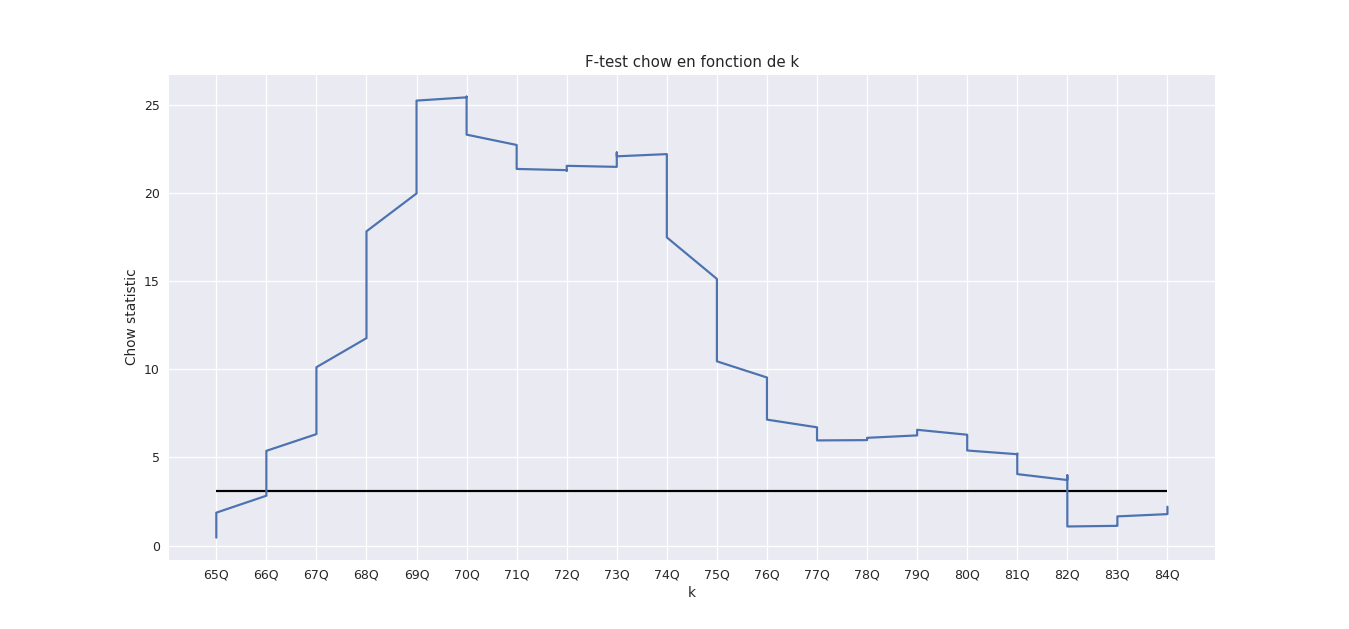

In [165]:
plt.close()

x =listk
x=list(map(lambda x: df.DATE[0:-1][x][2:-1], listk))
y = listchowstatistic


plt.figure(figsize=(15,7))
plt.plot(x,y)
plt.xlabel("k")
plt.ylabel("Chow statistic")
plt.hlines(chow_critic,xmin=x[0],xmax=x[-1])
plt.title("F-test chow en fonction de k")
plt.show()


## Question 11

In [88]:

inf=[]
unemp=[]
inf_lag1=[]
inf_lag2=[]
inf_lag3=[]
inf_lag4=[]

unemp_lag1=[]
unemp_lag2=[]
unemp_lag3=[]
unemp_lag4=[]
listdate=[]

for t in range(5,len(df.CPI.values)):
    
    inf.append((df.CPI.values[t] -df.CPI.values[t-1] )/(df.CPI.values[t-1] ))
    inf_lag1.append((df.CPI.values[t-1] -df.CPI.values[t-2] )/(df.CPI.values[t-2] ))
    inf_lag2.append((df.CPI.values[t-2] -df.CPI.values[t-3] )/(df.CPI.values[t-3] ))
    inf_lag3.append((df.CPI.values[t-3] -df.CPI.values[t-4] )/(df.CPI.values[t-4] ))
    inf_lag4.append((df.CPI.values[t-4] -df.CPI.values[t-5] )/(df.CPI.values[t-5] ))
    
    unemp.append(df.Unemp.values[t])
    listdate.append( df.DATE.values[t])
    unemp_lag1.append(df.Unemp.values[t-1])
    unemp_lag2.append(df.Unemp.values[t-2])
    unemp_lag3.append(df.Unemp.values[t-3])
    unemp_lag4.append(df.Unemp.values[t-4])


In [89]:
df_lag=pd.DataFrame([listdate,inf_lag1,inf_lag2,inf_lag3,inf_lag4,unemp_lag1,unemp_lag2,unemp_lag3,unemp_lag4,inf,unemp]).T
df_lag.columns=["listdate","inf_lag1","inf_lag2","inf_lag3","inf_lag4","unemp_lag1","unemp_lag2","unemp_lag3","unemp_lag4","inf","unemp"]

In [90]:
for col in df_lag.columns[1:] :
    df_lag[col]=df_lag[col].astype("float")

In [91]:
######### new ##########""

from statsmodels.api import add_constant
import statsmodels
x =np.array(df_lag[["inf_lag4"]])
X =add_constant(x)
y = df_lag[["unemp"]].values.flatten()
model=statsmodels.api.OLS(y, X)
result=model.fit()

In [92]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

formula = "unemp ~ -1+inf_lag1 + inf_lag2 + inf_lag3 + inf_lag4 +unemp_lag1 + unemp_lag2+ unemp_lag3 + unemp_lag4"
results = ols(formula,df_lag).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  unemp   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.727e+04
Date:                Sun, 28 Apr 2019   Prob (F-statistic):          2.76e-278
Time:                        16:16:38   Log-Likelihood:                 2.5502
No. Observations:                 207   AIC:                             10.90
Df Residuals:                     199   BIC:                             37.56
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
inf_lag1       4.3245      3.739      1.157      0.249      -3.049      11.698
inf_lag2      -2.3269      4.120     -0.565      0.573     -10.452       5.798
inf_lag3       7.2787      4.015      1.813      0.071      -0.638      15.195
inf_lag4       1.3123      3.781      0.347      0.729      -6.143       8.768
unemp_lag1     1.6155      0.071     22.781      0.000       1.476       1.755
unemp_lag2    -0.6537      0.135     -4.845      0.000      -0.920      -0.388
unemp_lag3    -0.0019      0.136     -0.014      0.989      -0.270       0.266
unemp_lag4     0.0215      0.069      0.311      0.756      -0.115       0.158
==============================================================================
Omnibus:                       23.777   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.244
Skew:                           0.446   Prob(JB):                     1.12e-14
Kurtosis:                       5.579   Cond. No.                     4.04e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
formula1 = "unemp ~ -1+inf_lag1 + inf_lag2 + inf_lag3 + inf_lag4 +unemp_lag1 + unemp_lag2+ unemp_lag3 + unemp_lag4 -1"
results1 = ols(formula1,df_lag).fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  unemp   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.727e+04
Date:                Sun, 28 Apr 2019   Prob (F-statistic):          2.76e-278
Time:                        16:16:44   Log-Likelihood:                 2.5502
No. Observations:                 207   AIC:                             10.90
Df Residuals:                     199   BIC:                             37.56
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
inf_lag1       4.3245      3.739      1.157      0.249      -3.049      11.698
inf_lag2      -2.3269      4.120     -0.565      0.573     -10.452       5.798
inf_lag3       7.2787      4.015      1.813      0.071      -0.638      15.195
inf_lag4       1.3123      3.781      0.347      0.729      -6.143       8.768
unemp_lag1     1.6155      0.071     22.781      0.000       1.476       1.755
unemp_lag2    -0.6537      0.135     -4.845      0.000      -0.920      -0.388
unemp_lag3    -0.0019      0.136     -0.014      0.989      -0.270       0.266
unemp_lag4     0.0215      0.069      0.311      0.756      -0.115       0.158
==============================================================================
Omnibus:                       23.777   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.244
Skew:                           0.446   Prob(JB):                     1.12e-14
Kurtosis:                       5.579   Cond. No.                     4.04e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
get_coef(results1)

,coef,t-value,p-value
inf_lag1,4.32452,1.15657,0.24884
inf_lag2,-2.32686,-0.56473,0.57289
inf_lag3,7.27867,1.81309,0.07132
inf_lag4,1.31226,0.34709,0.72889
unemp_lag1,1.61550,22.78075,0.00000
unemp_lag2,-0.65370,-4.84478,0.00000
unemp_lag3,-0.00189,-0.01391,0.98891
unemp_lag4,0.02150,0.31076,0.75631


In [95]:
formula2 = "unemp ~ -1+unemp_lag1 + unemp_lag2+ unemp_lag3 + unemp_lag4 "
results2 = ols(formula2,df_lag).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  unemp   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.194e+04
Date:                Sun, 28 Apr 2019   Prob (F-statistic):          7.21e-283
Time:                        16:16:47   Log-Likelihood:                -7.6170
No. Observations:                 207   AIC:                             23.23
Df Residuals:                     203   BIC:                             36.56
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
unemp_lag1     1.6910      0.070     24.107      0.000       1.553       1.829
unemp_lag2    -0.7257      0.138     -5.275      0.000      -0.997      -0.454
unemp_lag3    -0.0067      0.137     -0.049      0.961      -0.277       0.263
unemp_lag4     0.0393      0.069      0.565      0.572      -0.098       0.176
==============================================================================
Omnibus:                       29.377   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.930
Skew:                           0.662   Prob(JB):                     1.31e-14
Kurtosis:                       5.379   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
results2.conf_int()

,0,1
unemp_lag1,1.552726,1.829349
unemp_lag2,-0.996989,-0.454442
unemp_lag3,-0.276503,0.263186
unemp_lag4,-0.097616,0.176121


In [97]:
import numpy as np

#Return the model coefficients of a `smf.ols(...).fit()` object:
def get_coef(mdl_fit):
    result = np.round(pd.DataFrame([mdl_fit.params, mdl_fit.tvalues, mdl_fit.pvalues], index = ["coef", "t-value", "p-value"]).T, 5)
    return(result)



In [98]:
get_coef(results2)

,coef,t-value,p-value
unemp_lag1,1.69104,24.10684,0.00000
unemp_lag2,-0.72572,-5.27478,0.00000
unemp_lag3,-0.00666,-0.04865,0.96124
unemp_lag4,0.03925,0.56547,0.57238


To compare these two models, we will compare them by their SSR (sum of squared residuals, also known as residual sum of squares (RSS), or sum of squared errors of prediction (SSE)). We can do this by carrying out an ANOVA test.

In [99]:
import statsmodels
statsmodels.stats.api.anova_lm(results2, results1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,203.0,13.045400,0.0,NaN,NaN,NaN
1,199.0,11.824839,4.0,1.220561,5.135199,0.000587


Since p-value < 0.05, we reject the null hypothesis H0:SSRR=SSRUR. This means that the models are not identical. To check, which model is better, we can look at the SSR and the AIC, or BIC values:

In [101]:


pd.DataFrame([results2.ssr, results1.ssr], index = ["Restricted", "Unrestricted"], columns = ["SSR"]).T



,Restricted,Unrestricted
SSR,13.0454,11.824839


In [102]:


pd.DataFrame([results2.aic, results1.aic], index = ["Restricted", "Unrestricted"], columns = ["AIC"]).T



,Restricted,Unrestricted
AIC,23.233929,10.899647


In [103]:
pd.DataFrame([results2.bic, results1.bic], index = ["Restricted", "Unrestricted"], columns = ["BIC"]).T

,Restricted,Unrestricted
BIC,36.564804,37.561397




Granger causality null hypothesis

    The Null hypothesis for grangercausalitytests is that the time series in the second column, x2, does NOT cause the time series in the first column, x1. Grange causality means that past values of x2 have a statistically significant effect on the current value of x1, taking past values of x1 into account as regressors. We reject the null hypothesis that x2 does NOT cause x1 if the pvalues are below a desired size of the test.



In [105]:

df_granger=df_lag[["unemp","inf"]]
result = statsmodels.tsa.stattools.grangercausalitytests(df_granger, maxlag=4, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=11.4081 , p=0.0009  , df_denom=203, df_num=1
ssr based chi2 test:   chi2=11.5767 , p=0.0007  , df=1
likelihood ratio test: chi2=11.2631 , p=0.0008  , df=1
parameter F test:         F=11.4081 , p=0.0009  , df_denom=203, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.5163  , p=0.0121  , df_denom=200, df_num=2
ssr based chi2 test:   chi2=9.2584  , p=0.0098  , df=2
likelihood ratio test: chi2=9.0554  , p=0.0108  , df=2
parameter F test:         F=4.5163  , p=0.0121  , df_denom=200, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.5531  , p=0.0041  , df_denom=197, df_num=3
ssr based chi2 test:   chi2=14.1448 , p=0.0027  , df=3
likelihood ratio test: chi2=13.6760 , p=0.0034  , df=3
parameter F test:         F=4.5531  , p=0.0041  , df_denom=197, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.3081  , p=0.0119  

<IPython.core.display.Javascript object>


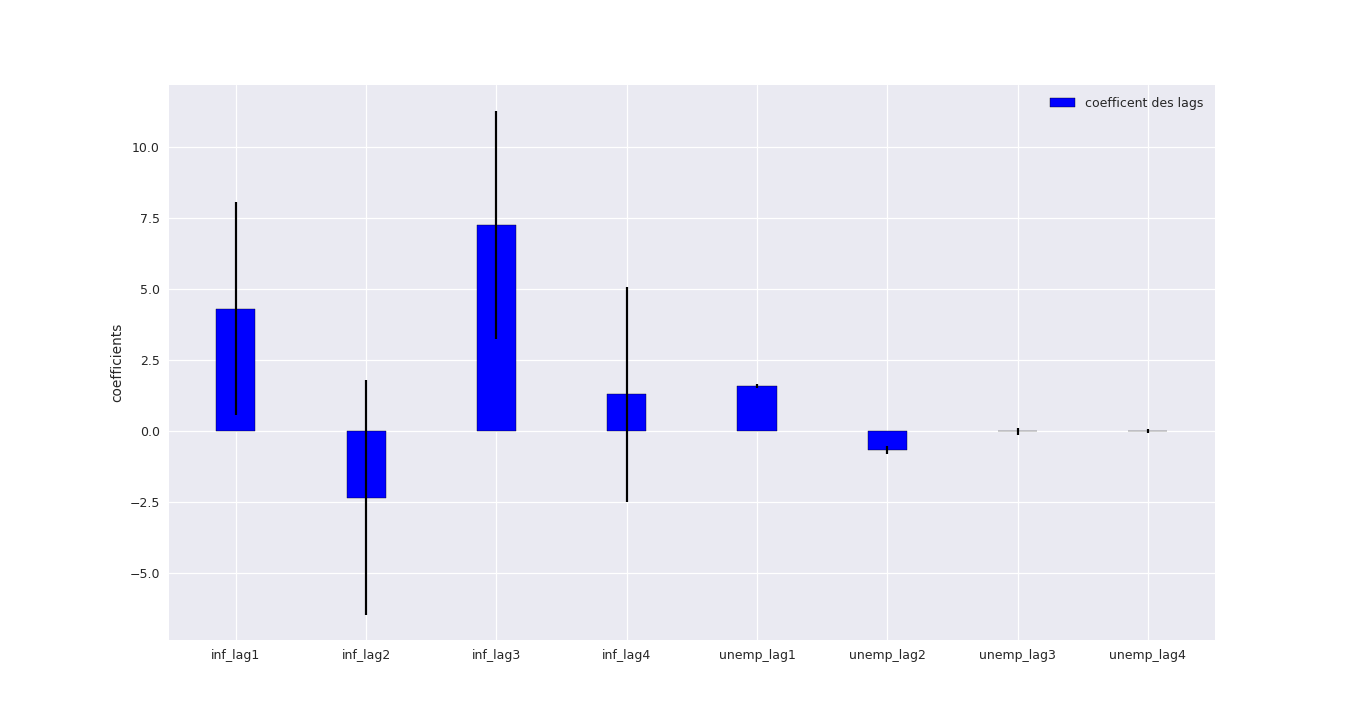

In [107]:


plt.close()
plt.figure(figsize=(15,8))

# width of the bars
barWidth = 0.3
 
# Choose the height of the blue bars
bars1 = results.params.values
 
# Choose the height of the error bars (bars1)
yer1 = results.bse.values
 

# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', yerr=yer1, capsize=7, label='coefficent des lags')
 
# Create cyan bars
#plt.bar(r2, bars2, width = barWidth, color = 'cyan', edgecolor = 'black', yerr=yer2, capsize=7, label='sorgho')
 
# general layout
plt.xticks([r for r in range(len(bars1))], results.params.index.values)
plt.ylabel('coefficients')
plt.legend()
plt.show()
# Show graphic


In [108]:
res=get_coef(results1)


In [112]:
res

,coef,t-value,p-value
inf_lag1,4.32452,1.15657,0.24884
inf_lag2,-2.32686,-0.56473,0.57289
inf_lag3,7.27867,1.81309,0.07132
inf_lag4,1.31226,0.34709,0.72889
unemp_lag1,1.61550,22.78075,0.00000
unemp_lag2,-0.65370,-4.84478,0.00000
unemp_lag3,-0.00189,-0.01391,0.98891
unemp_lag4,0.02150,0.31076,0.75631


<IPython.core.display.Javascript object>


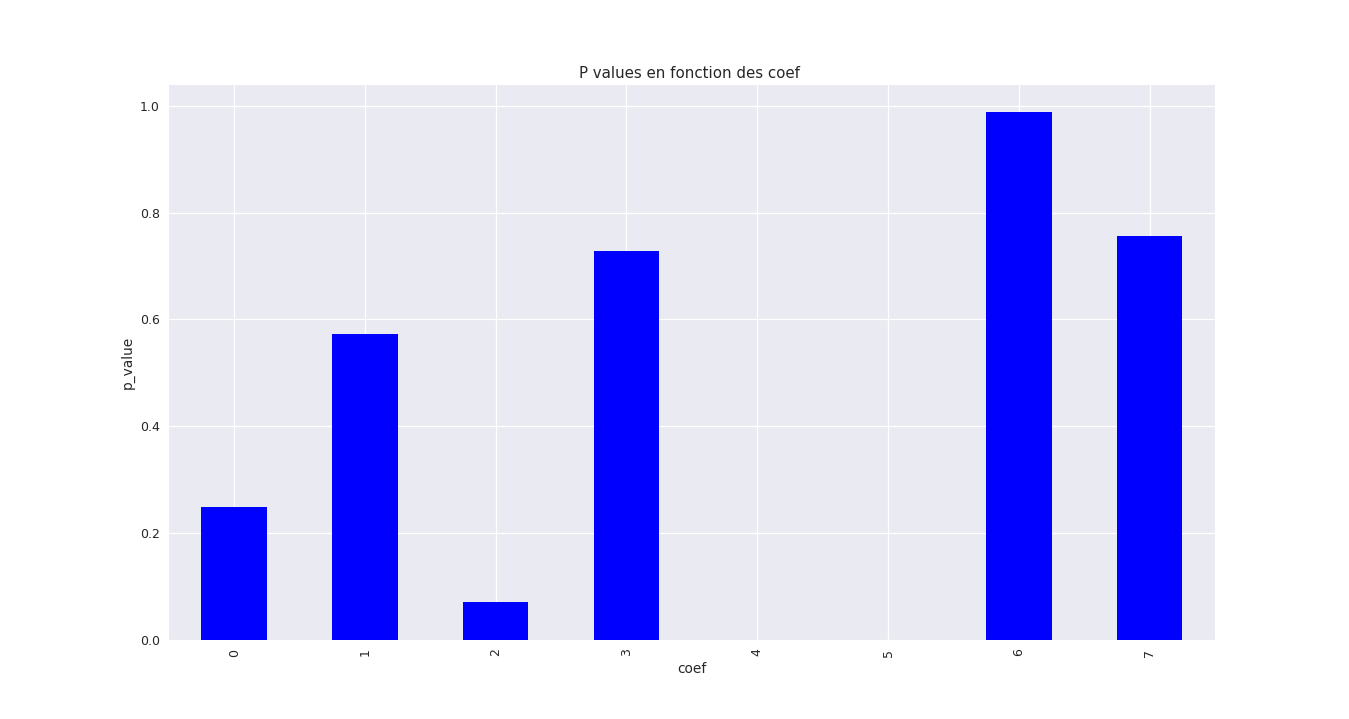

In [114]:


plt.close()
plt.close()
plt.figure(figsize=(15,8))

p_values = pd.Series(pd.DataFrame(res)['p-value'].values)

plt.title("P values en fonction des coef ")
plt.xlabel("coef")
#plt.xticks( res.index.values)
plt.ylabel("p_value")
p_values.plot.bar(color='b')
plt.show()



After a lag of 3 the p-value goes to zero. x2 DOES CAUSE x1.


In [115]:
results.bse.values

array([3.73910908, 4.12031053, 4.01450432, 3.78069738, 0.07091492,
       0.13492784, 0.13594684, 0.06919993])

In [116]:
results.params.index.values

array(['inf_lag1', 'inf_lag2', 'inf_lag3', 'inf_lag4', 'unemp_lag1',
       'unemp_lag2', 'unemp_lag3', 'unemp_lag4'], dtype=object)

<IPython.core.display.Javascript object>


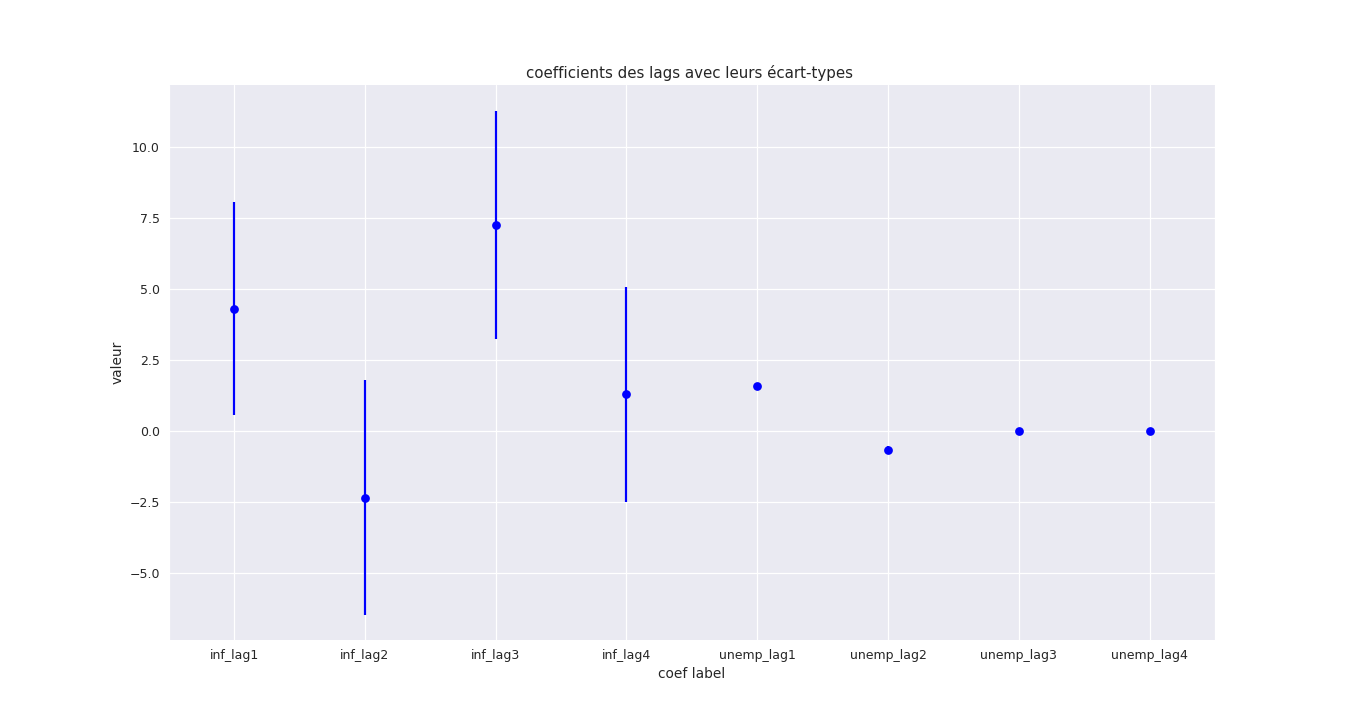

In [117]:
import matplotlib.pyplot as plt


bars1 = results.params.values
 
# Choose the height of the error bars (bars1)
yer1 = results.bse.values

x = results.params.values
y = [1, 3, 5,7,9,11,13,15]
errors = results.bse.values

plt.figure(figsize=(15,8))
plt.errorbar(y, x, yerr=errors, fmt = 'o', color = 'b')
plt.xticks((0, 1, 3, 5,7,9,11,13,15 , 16), ('', 'inf_lag1', 'inf_lag2', 'inf_lag3', 'inf_lag4', 'unemp_lag1',
       'unemp_lag2', 'unemp_lag3', 'unemp_lag4','')) 

plt.title("coefficients des lags avec leurs écart-types ")
plt.xlabel("coef label")
plt.ylabel("valeur")

plt.show()

### test de vraisemblance


In [119]:
formula1 = "unemp ~ inf_lag1 + inf_lag2 + inf_lag3 + inf_lag4 +unemp_lag1 + unemp_lag2+ unemp_lag3 + unemp_lag4 -1"
results1 = ols(formula1,df_lag).fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  unemp   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.727e+04
Date:                Sun, 28 Apr 2019   Prob (F-statistic):          2.76e-278
Time:                        16:21:21   Log-Likelihood:                 2.5502
No. Observations:                 207   AIC:                             10.90
Df Residuals:                     199   BIC:                             37.56
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
inf_lag1       4.3245      3.739      1.157      0.249      -3.049      11.698
inf_lag2      -2.3269      4.120     -0.565      0.573     -10.452       5.798
inf_lag3       7.2787      4.015      1.813      0.071      -0.638      15.195
inf_lag4       1.3123      3.781      0.347      0.729      -6.143       8.768
unemp_lag1     1.6155      0.071     22.781      0.000       1.476       1.755
unemp_lag2    -0.6537      0.135     -4.845      0.000      -0.920      -0.388
unemp_lag3    -0.0019      0.136     -0.014      0.989      -0.270       0.266
unemp_lag4     0.0215      0.069      0.311      0.756      -0.115       0.158
==============================================================================
Omnibus:                       23.777   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.244
Skew:                           0.446   Prob(JB):                     1.12e-14
Kurtosis:                       5.579   Cond. No.                     4.04e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [120]:
results1.params[0:4]

inf_lag1    4.324524
inf_lag2   -2.326863
inf_lag3    7.278671
inf_lag4    1.312256
dtype: float64

In [121]:
results1.params[0:4].sum()

10.588586895963708

In [123]:
formula2 = "unemp ~ inf_lag3 +unemp_lag1 + unemp_lag2+ unemp_lag3 + unemp_lag4 -1"
results2 = ols(formula2,df_lag).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  unemp   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.777e+04
Date:                Sun, 28 Apr 2019   Prob (F-statistic):          1.84e-284
Time:                        16:21:31   Log-Likelihood:                 1.5193
No. Observations:                 207   AIC:                             6.961
Df Residuals:                     202   BIC:                             23.62
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
inf_lag3       9.5424      2.210      4.318      0.000       5.185      13.900
unemp_lag1     1.6221      0.069     23.455      0.000       1.486       1.758
unemp_lag2    -0.6852      0.132     -5.180      0.000      -0.946      -0.424
unemp_lag3     0.0416      0.132      0.316      0.752      -0.218       0.301
unemp_lag4     0.0045      0.067      0.068      0.946      -0.128       0.137
==============================================================================
Omnibus:                       19.038   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.804
Skew:                           0.330   Prob(JB):                     1.53e-11
Kurtosis:                       5.311   Cond. No.                     1.64e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [124]:
import statsmodels
statsmodels.stats.api.anova_lm(results2, results1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,202.0,11.943200,0.0,NaN,NaN,NaN
1,199.0,11.824839,3.0,0.118361,0.663963,0.575119
